## Springpot

In [12]:
using RHEOS
include("plotmodel.jl");

By typing the name of the model, it is possible to visualise its graphical representation and its parameters. 

In [7]:
Springpot


Model name: springpot

Free parameters: cᵦ and β

                ____ ╱╲ ____
                     ╲╱  cᵦ, β
                

### Constitutive equation

$\sigma(t) = c_{\beta} \frac{d^\beta \epsilon(t)}{dt^\beta}$ for $0 \leq \beta \leq 1$

### Relaxation modulus

$G(t) = \frac{c_{\beta} }{\Gamma(1-\beta)} t^{-\beta}$ 

### Creep modulus

$J(t) = \frac{1}{c_\beta \Gamma(1+\beta)}t^\beta$ 

### Storage modulus

$G^{\prime}(\omega) = c_\beta \omega^\beta \cos(\frac{\pi}{2}\beta)$

### Loss modulus

$G^{\prime\prime}(\omega) = c_\beta \omega^\beta \sin(\frac{\pi}{2}\beta)$

## Spring

When $\beta = 0$ the springpot specialises to a spring

In [8]:
Spring


Model name: spring

Free parameters: k

                ___╱╲  ╱╲  ╱╲  ________
                     ╲╱  ╲╱  ╲╱  k
                

## Dashpot

When $\beta = 1$ the springpot specialises to a dashpot

In [9]:
Dashpot


Model name: dashpot

Free parameters: η

                 ___
             _____| |_____
                 _|_|
                     η
                

### Qualitative behaviours of the moduli

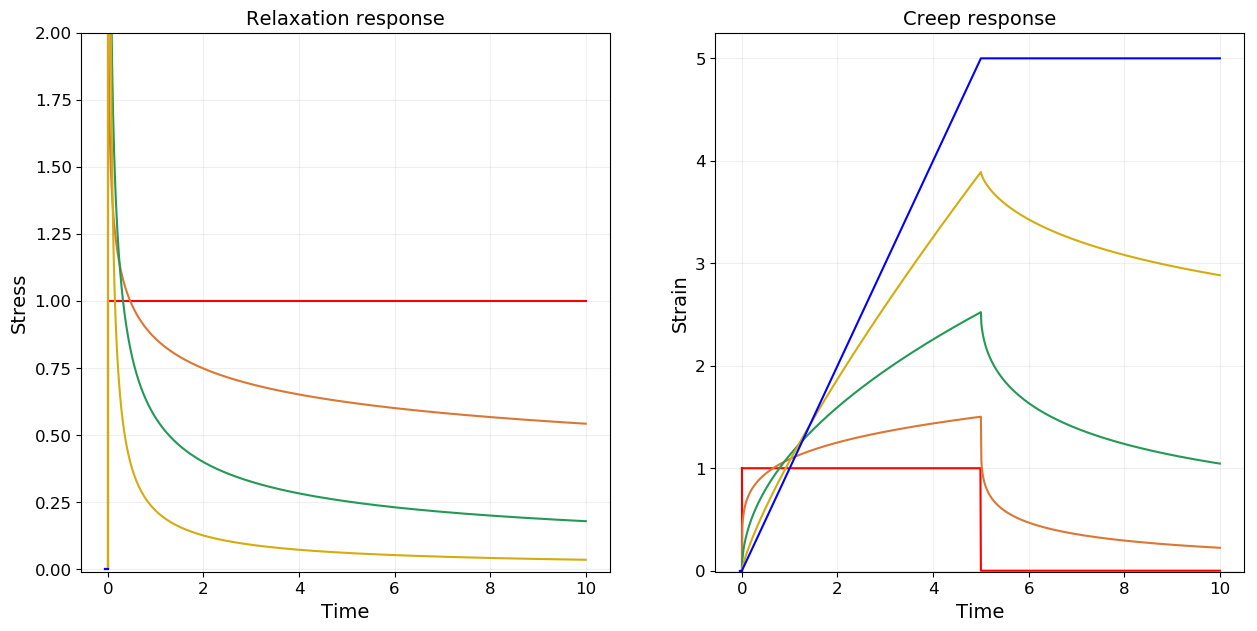

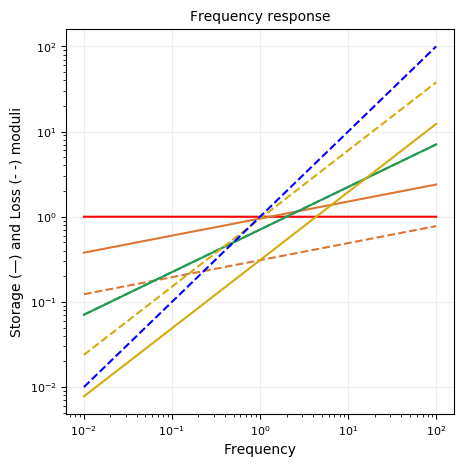

In [13]:
models = Vector{RheoModel}()

# Spring
models = vcat(models, RheoModel(Spring, (k = 1.0,)))

# plot moduli for varying β
for (i,beta) in enumerate([0.2, 0.5, 0.8])
    
    models = vcat(models, RheoModel(Springpot,(cᵦ = 1.0, β = beta)))
 
end

# Dashpot
models = vcat(models, RheoModel(Dashpot, (η = 1.0,)))

plotmodel(models, ymaxG = 2.0);